<a href="https://colab.research.google.com/github/AdityaMO3001/diabetes_indicator/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/AdityaMO3001/diabetes_indicator/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'  # Update with your uploaded file path
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Rename columns for better readability
df.rename(columns={"Diabetes_binary": "Diabetes"}, inplace=True)

In [ ]:
sns.set(style="whitegrid")

In [ ]:
# Convert Diabetes column (0 = No, 1 = Yes)
df["Diabetes"] = df["Diabetes"].map({0: "No Diabetes", 1: "Diabetic"})

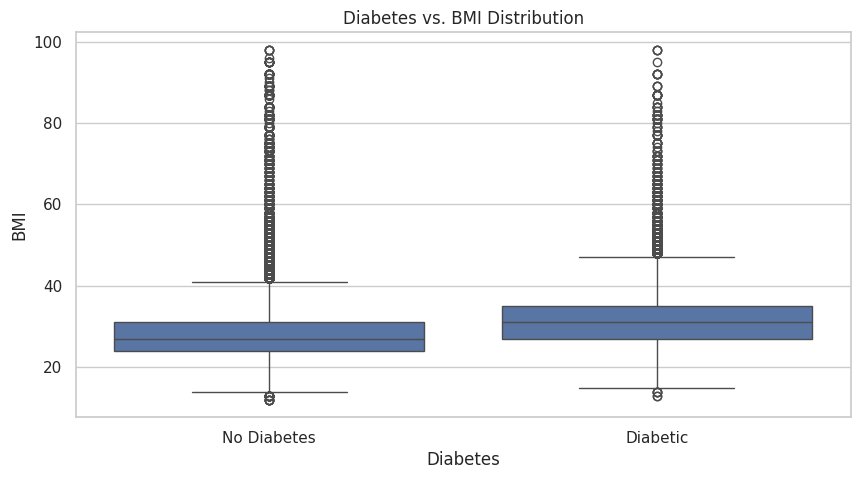

In [ ]:
# Visualization 1: Diabetes vs. BMI Distribution
plt.figure(figsize=(10,5))
sns.boxplot(x="Diabetes", y="BMI", data=df)
plt.title("Diabetes vs. BMI Distribution")
plt.show()

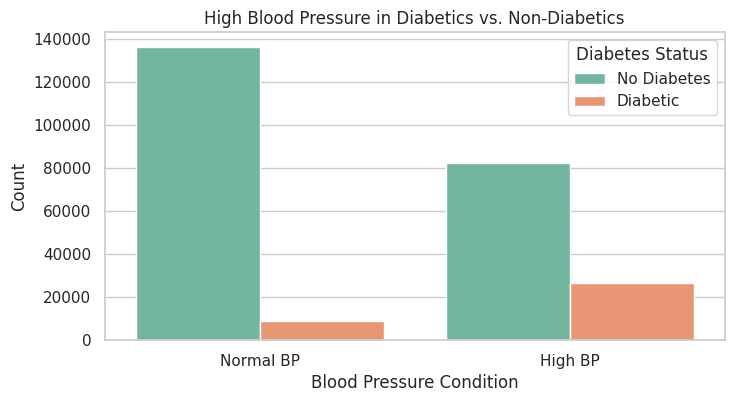

In [ ]:
# Visualization 2: High Blood Pressure & Diabetes
plt.figure(figsize=(8,4))
sns.countplot(x="HighBP", hue="Diabetes", data=df, palette="Set2")
plt.xticks([0,1], ["Normal BP", "High BP"])
plt.xlabel("Blood Pressure Condition")
plt.ylabel("Count")
plt.title("High Blood Pressure in Diabetics vs. Non-Diabetics")
plt.legend(title="Diabetes Status")
plt.show()

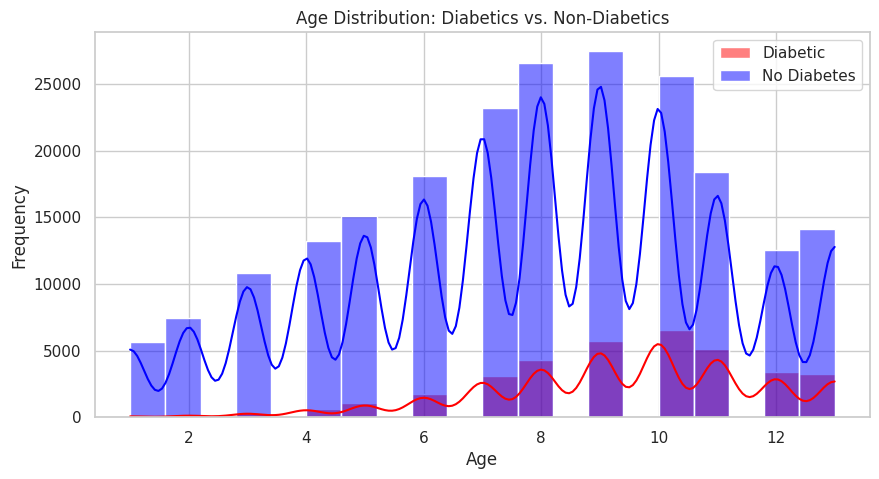

In [ ]:
# Visualization 3: Age & Diabetes Risk
plt.figure(figsize=(10,5))
sns.histplot(df[df["Diabetes"] == "Diabetic"]["Age"], bins=20, kde=True, color="red", label="Diabetic")
sns.histplot(df[df["Diabetes"] == "No Diabetes"]["Age"], bins=20, kde=True, color="blue", label="No Diabetes")
plt.title("Age Distribution: Diabetics vs. Non-Diabetics")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Key Insights:
**Non-diabetics (blue)** dominate all age groups, showing a higher overall population.

**Diabetics (red)** increase slightly with age, suggesting higher risk in older individuals.

*   The gap between diabetics and non-diabetics widens in middle-to-older age
groups.
*   Prevention efforts should target older adults for early screening and lifestyle changes.



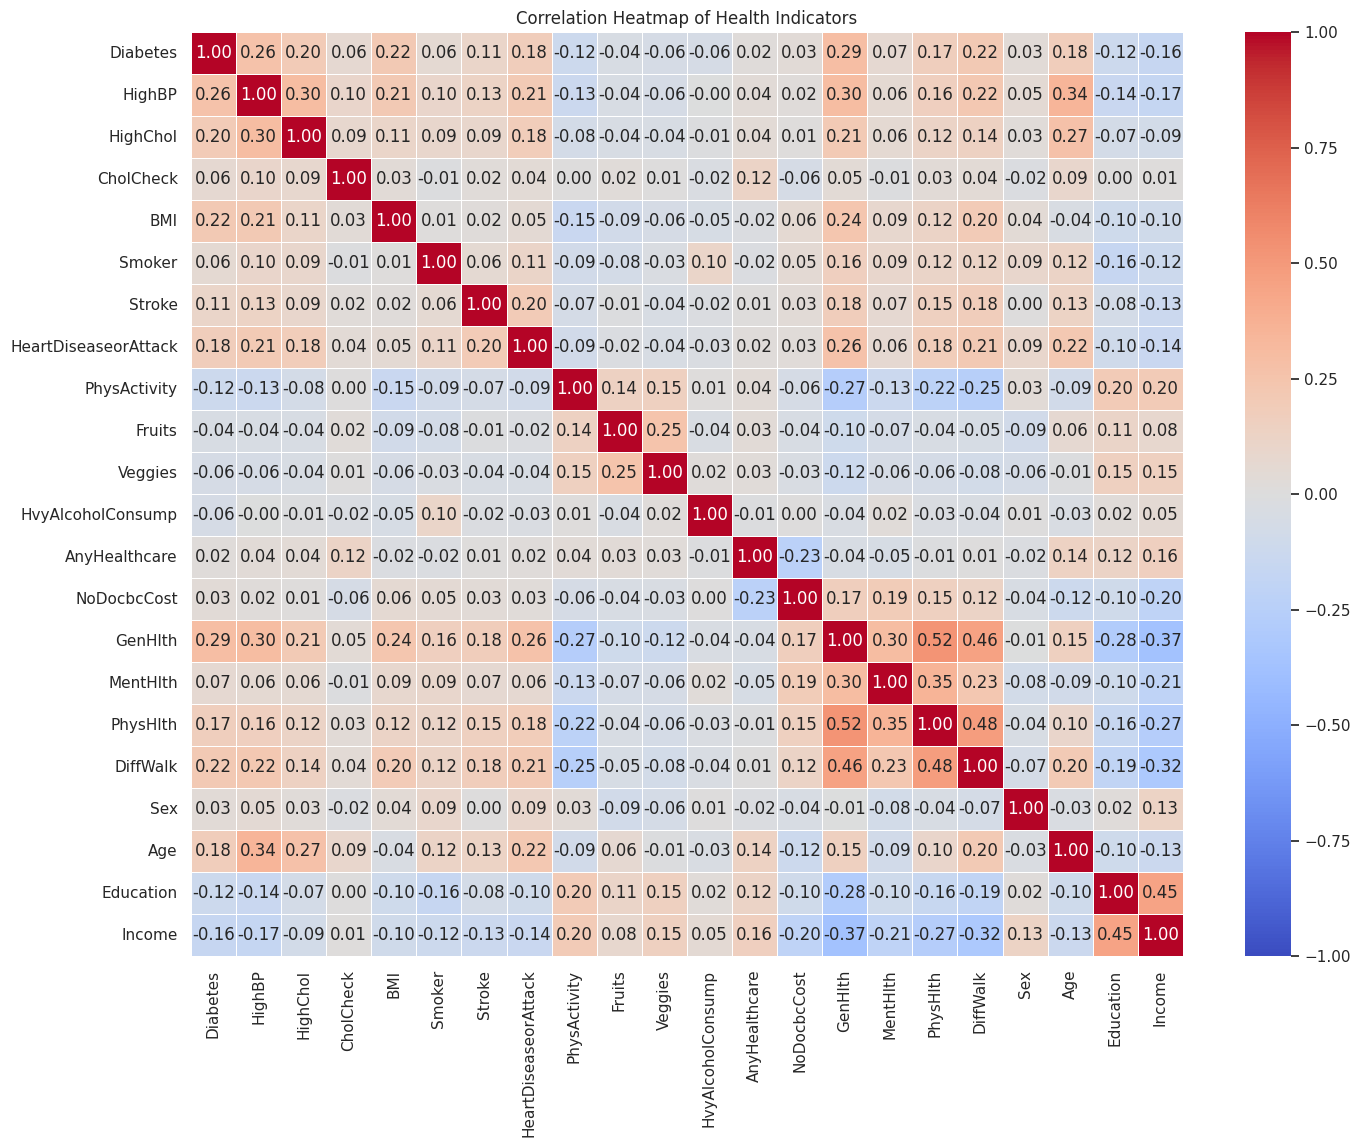

In [ ]:
# Convert categorical values to numerical (Diabetes: 1, No Diabetes: 0)
df["Diabetes"] = df["Diabetes"].map({"No Diabetes": 0, "Diabetic": 1})

# Compute the correlation matrix (only numeric columns)
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Set title
plt.title("Correlation Heatmap of Health Indicators")
plt.show()


# **Strongest Correlations with Diabetes:**

**Age (+0.34)** – Older individuals have a higher likelihood of diabetes.

**General Health Issues (+0.30)** – Poor general health is strongly linked to diabetes.

**High Blood Pressure (HighBP) (+0.30)** – People with high BP are more likely to be diabetic.

**Difficulty Walking (DiffWalk) (+0.22)** – Reduced mobility is correlated with diabetes.

**Heart Disease/Attack (+0.21)** – Cardiovascular issues increase diabetes risk.

**BMI (+0.21)** – Higher body mass index contributes to diabetes risk.

# Weak or Negative Correlations:
**Physical Activity (-0.13)** – Regular physical activity slightly reduces diabetes risk.

**Income (-0.17)** – Higher income is weakly associated with lower diabetes risk.

**Education (-0.14)** – More education seems to slightly reduce the likelihood of diabetes.

**Fruit & Vegetable Consumption (~ -0.06 to -0.04)** – Eating healthy foods shows little correlation but may help prevent diabetes.

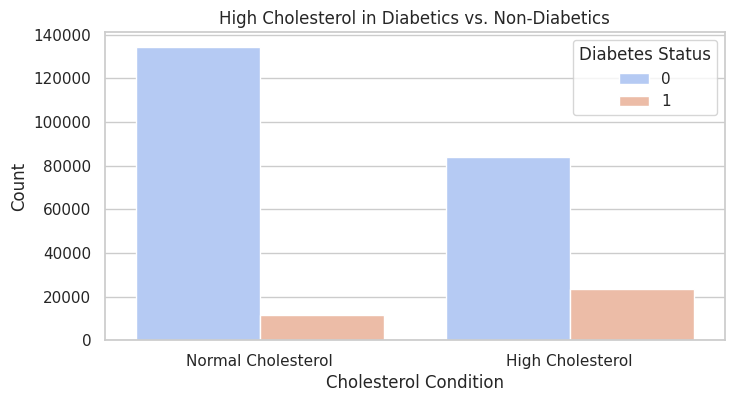

In [ ]:
# Create a countplot for High Cholesterol vs Diabetes
plt.figure(figsize=(8,4))
sns.countplot(x="HighChol", hue="Diabetes", data=df, palette="coolwarm")

# Labeling
plt.xticks([0,1], ["Normal Cholesterol", "High Cholesterol"])
plt.xlabel("Cholesterol Condition")
plt.ylabel("Count")
plt.title("High Cholesterol in Diabetics vs. Non-Diabetics")
plt.legend(title="Diabetes Status")
plt.show()


#Expected Insights from the Chart
Higher cholesterol is more common in diabetics → Potential metabolic syndrome link.

Diabetics may have a higher proportion with high cholesterol, reinforcing cardiovascular risks.

**Preventive Focus →** Encourage cholesterol screening in diabetic individuals to reduce heart disease risk.